Find volume-weighted average vertical diffusivity 3D file for MITgcm
=========================================================================

Set values of diffusivity to volume-weighter average of diffusivity from another Kv file. For example, I would like to compare the flux of tracer in a canyon run with enhanced diffusivity within the canyon to one with the same average diffusivity, this is the average diffusivity in the domain per cell weigthed by the volume of each cell.

The result is a single number to enter to the ptracers.data file in KvDiffTr01

Avg vertical diffusivities I found for the whole domain:


360x360x90/KrDiff1E_5_1E_3_90zlev_360x360_Quad.bin is 0.000038

360x360x90/KrDiff1E_5_1E_4_90zlev_360x360_Quad.bin is 0.000013

360x360x90/KrDiff1E_7_1E_4_90zlev_360x360_Quad.bin is 0.000003

360x360x90/KrDiff1E_7_1E_3_90zlev_360x360_Quad.bin is 0.000028

K. Ramos-Musalem

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import nanmean

from math import *

import struct

from netCDF4 import Dataset

import  sys

%matplotlib inline

In [2]:
lib_path = os.path.abspath('../PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

In [3]:
nx = 360
ny = 360
nz = 90

In [5]:
## Get grid variables
filename='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/gridGlob.nc'
GridOut = Dataset(filename)

#for dimobj in GridOut.variables.values():
#    print dimobj

hFacC = rout.getField(filename,'HFacC') #(90,360,360)
hFacCmasked = np.ma.masked_values(hFacC, 0)
rA = rout.getField(filename,'rA')

drF= GridOut.variables['drF']
MASKhFacC = np.ma.getmask(hFacCmasked)


In [11]:
# Volume of each cell in one array:
rA_exp = np.expand_dims(rA,0)
drF_exp = np.expand_dims(np.expand_dims(drF,1),1)
rA_exp = rA_exp + np.zeros(hFacC.shape)
drF_exp = drF_exp + np.zeros(hFacC.shape)
    
Volume = hFacC*drF_exp*rA_exp

print('The volume is %e m^3' %np.sum(Volume))

The volume is 5.968743e+12 m^3


<matplotlib.colorbar.Colorbar instance at 0x7f8aa7d35e18>

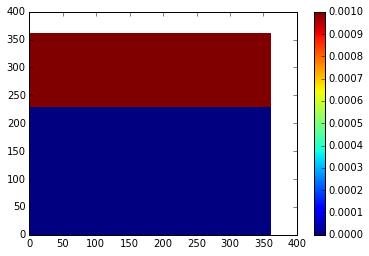

In [33]:
# Get Kv values from binary file
dt = np.dtype('>f8')  # float 64 big endian

fileNAME = "%dx%dx%d/KrDiff1E_7_1E_3_%dzlev_%dx%d_Quad.bin" %(nx,ny,nz,nz,nx,ny)
kv=np.fromfile(fileNAME, dt)

Kv=np.reshape(kv,(nz,ny,nx),order='C')
np.shape(Kv)

plt.pcolor(Kv[29,:,:])
plt.colorbar()

In [34]:
# Calculate volume-weighted average

AvgKv = np.sum(Kv*Volume)/(np.sum(Volume))

In [35]:
print('The volume-weighted average kv for file %s is %f' %(fileNAME, AvgKv))

The volume-weighted average kv for file 360x360x90/KrDiff1E_7_1E_3_90zlev_360x360_Quad.bin is 0.000028
